In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread("./images/lena_noise_512.png", 0)

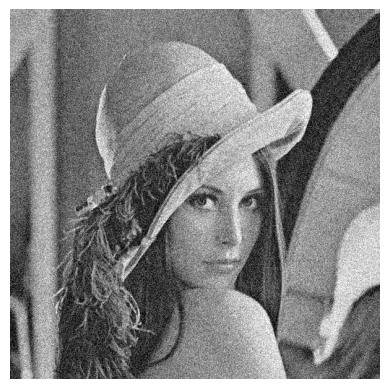

In [3]:
plt.axis("off")
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
k = 7
mask = np.ones([k, k], dtype = 'float16') 
mask = mask/pow(k,2)
print(mask)

[[0.0204 0.0204 0.0204 0.0204 0.0204 0.0204 0.0204]
 [0.0204 0.0204 0.0204 0.0204 0.0204 0.0204 0.0204]
 [0.0204 0.0204 0.0204 0.0204 0.0204 0.0204 0.0204]
 [0.0204 0.0204 0.0204 0.0204 0.0204 0.0204 0.0204]
 [0.0204 0.0204 0.0204 0.0204 0.0204 0.0204 0.0204]
 [0.0204 0.0204 0.0204 0.0204 0.0204 0.0204 0.0204]
 [0.0204 0.0204 0.0204 0.0204 0.0204 0.0204 0.0204]]


In [5]:
bd = int(k/2)
print(bd)

3


In [6]:
f = img.copy().astype(np.float16)

In [7]:
out = np.zeros_like(img, dtype = 'float16')

In [8]:
(m,n) = img.shape
print(m,n,bd)

512 512 3


In [9]:
for i in range(bd,m-bd):
    for j in range(bd,n-bd):
        tmp = 0
        for p in range(k):
            for q in range(k):
                tmp = tmp + (mask[p,q]*f[i+p-bd,j+q-bd])
        out[i,j] = tmp    

In [10]:
out = out.astype(np.uint8)

In [11]:
imgs = cv2.hconcat([img, out])

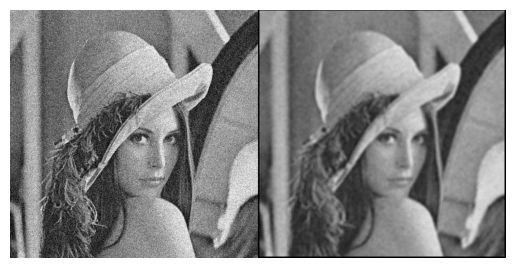

In [12]:
plt.axis("off")
plt.imshow(imgs, cmap='gray')
plt.show()